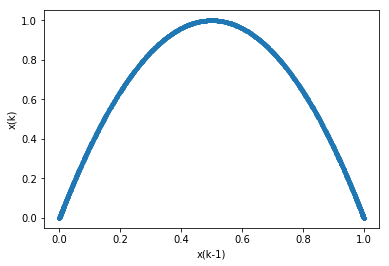

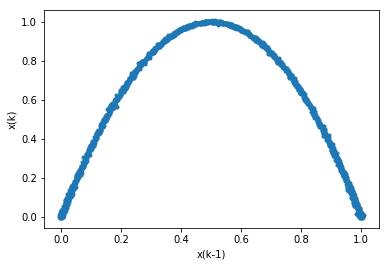

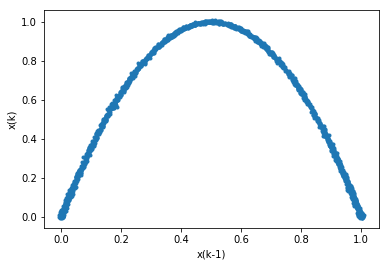

(2001, 1)

(2000, 1)

(2000, 1)

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold #Importando a função K-fold que vai gerar o iterador
import matplotlib.pyplot as plt

#(ANTIGO) Valores importados de X e D do arquivo matlab oferecido pelo professor, arquivo chamado "dadoslogistico.mat" que foi gerado pelo script "dadoslogistico.m"
# X = np.array(['0.46497', '1.0041', '0.013769', '0.072867', '0.026704', '0.054802', '0.091881', '0.63774', '0.99632', '0.29704', '0.57602', '0.76945', '0.47678', '1.0439', '0.14385', '0.078653', '0.61741', '0.90006', '0.38338', '0.94778', '0.51439', '0.99256', '-0.017328', '-0.075596', '0.12734', '0.22036', '0.51115', '0.97013', '0.070344', '0.40058', '1.0806', '0.070477', '0.052187', '0.050522', '0.62803', '1.1552', '-0.050605', '0.069091', '0.27821', '0.81525', '0.60633', '0.79105', '0.76551', '0.8206', '0.62646', '1.1083', '0.076683', '-0.075931', '-0.091089', '-0.067789', '-0.058925', '0.27026', '0.51847', '0.85243', '0.23272', '0.65186', '0.92631', '0.22259', '0.81032', '0.90212', '0.61763', '0.7175', '0.65215', '0.94393', '0.045742', '0.27127', '0.30972', '1.1463', '0.0023783', '0.23923', '0.53433', '0.90408', '0.055782', '0.48844', '0.83009', '0.096396', '0.31167', '0.92264', '0.14765', '0.28169', '0.9032', '-0.031425', '0.41213', '0.79768', '0.49205', '1.0641', '0.07885', '0.042285', '0.3064', '0.38228', '0.92082', '0.19134', '0.031507', '0.48664', '0.90083', '0.0109', '0.35905', '0.74214', '0.86943', '0.22702', '1.0301', '0.090618', '0.51658', '0.87095', '0.50911', '1.0462', '-0.0067533', '0.036779', '-0.10221', '0.35747', '0.98898', '0.2139', '0.69094', '0.97721', '0.5169', '1.0007', '0.45348', '0.8385', '0.36327', '0.885', '0.05925', '0.6487', '1.0516', '-0.026926', '0.0085443', '-0.29018', '-0.029253', '0.087498', '0.8264', '0.89345', '0.58422', '0.94916', '0.028045', '-0.09864', '0.13749', '0.50097', '0.99998', '0.19229', '0.1229', '0.60881', '0.78587', '0.68024', '0.8311', '0.43606', '0.9404', '0.25069', '0.72685', '0.81846', '0.75394', '0.95759', '0.1539', '0.3732', '1.0187', '0.0433', '0.19694', '0.14349', '0.81034', '0.3855', '0.86219', '0.065096', '0.44154', '0.95364', '0.32309', '0.93865', '0.13203', '0.74675', '0.93549', '0.40285', '1.1174', '0.2609', '0.46315', '1.0607', '-0.13806', '-0.10155', '0.12622', '0.014818', '0.11472', '0.59055', '0.80031', '0.15951', '0.042727', '0.4243', '0.96183', '0.052175', '0.33095', '0.83105', '0.30683', '1.0263', '-0.028868', '-0.065521', '0.30744', '0.45188', '0.96158', '0.03808', '0.17871', '0.47929', '1.0197', '0.34185', '0.69045', '0.6388', '0.76438', '0.27919', '0.75775', '0.59595', '0.84253', '0.84122', '0.57449', '1.0575', '-0.024131', '0.027185', '0.28718', '0.89913', '0.41104', '1.0587', '0.38568', '0.97708', '0.28375', '0.88166', '0.42358', '0.98784', '0.014612', '0.21742', '0.71734', '0.89847', '0.26819', '0.70183', '0.90026', '0.36115', '0.89168', '0.29342', '0.72404', '1.0073', '0.20246', '0.18595', '0.74026', '0.75812', '0.71042', '0.74535', '0.67358', '0.67482', '0.704', '0.88042', '0.15934', '0.51993', '1.0772', '0.16871', '0.13856', '0.6852', '1.173', '0.16135', '0.21173', '0.91816', '0.48966', '0.98006', '0.04542', '0.48888', '1.0737', '-0.026432', '-0.014347', '0.12352', '0.51678', '1.1119', '-0.036253', '-0.027806', '0.27209', '0.86887', '0.6948', '0.85864', '0.50309', '1.1674', '-0.052639', '0.086169', '0.22854', '0.74305', '0.62315', '0.7629', '0.44452', '0.94459', '0.038887', '0.1165', '0.22766', '0.84691', '0.74462', '0.57289', '0.84781', '0.11529', '0.4941', '0.96997', '0.14193', '0.21468', '0.8858', '0.70262', '0.58308', '0.39103', '1.1034', '-0.13037', '0.0034433', '-0.022183', '0.016256', '0.21539', '0.41314', '0.96836', '-0.088115', '0.07583', '0.19258', '0.61911', '0.75436', '0.58813', '0.91603', '0.38233', '0.80618', '0.55204', '1.0709', '0.060766', '0.31106', '1.0518', '0.25096', '0.54084', '0.89433', '0.12793', '0.2463', '0.74372', '0.98735', '0.46546', '0.99852', '-0.024611', '0.026816', '-0.00099977', '0.051304', '0.28363', '0.6077', '1.0343', '0.045838', '0.024584', '0.15033', '0.66142', '0.99656', '0.30467', '0.83127', '0.67206', '0.9527', '-0.1438', '0.10169', '0.11911', '0.21133', '0.62285', '0.80255', '0.33158', '0.93097', '0.19898', '0.64418', '0.97718', '0.02426', '0.003618', '0.055396', '0.38477', '0.99602', '0.37962', '0.91455', '0.30883', '0.59797', '0.90375', '0.56358', '0.94012', '0.24072', '0.68159', '0.67772', '0.77453', '0.35797', '1.0783', '0.37708', '1.1617', '0.25421', '0.86811', '0.41579', '0.92096', '0.0074924', '0.12682', '0.068702', '0.29773', '0.95385', '0.14622', '0.30346', '0.82847', '0.55015', '1.0481', '0.073583', '0.040339', '0.31307', '0.80667', '0.1448', '0.23363', '0.96197', '0.3436', '0.90679', '0.32337', '0.86984', '0.15925', '0.71558', '0.9309', '0.35656', '0.9066', '0.47617', '0.98771', '0.041884', '-0.054193', '0.1342', '0.75604', '0.90959', '0.25511', '0.58801', '0.94528', '0.19309', '0.61749', '1.0037', '0.70863', '1.1099', '-0.04939', '0.17309', '0.32024', '0.76617', '0.41315', '1.0321', '-0.0032329', '0.04468', '-0.043904', '0.049959', '0.28608', '0.56544', '1.0059', '0.0074244', '0.46696', '1.0859', '0.10977', '-0.087861', '0.14718', '0.67042', '0.69057', '0.91262', '0.61909', '0.97048', '0.50156', '1.0232', '0.10699', '0.036025', '0.21391', '0.37739', '0.96558', '0.045223', '0.18124', '0.55409', '0.86162', '0.0042729', '-0.075918', '-0.046472', '0.16673', '0.75571', '0.63713', '0.72526', '0.67', '0.64703', '0.97193', '0.92082', '0.66771', '0.8691', '0.74414', '0.88519', '0.52713', '0.8107', '0.039576', '-0.058625', '0.13918', '0.29292', '0.86181', '0.51657', '1.0327', '0.11239', '0.52698', '1.0777', '-0.10596', '-0.08613', '0.29827', '0.78368', '0.33653', '0.84878', '0.35909', '0.83504', '0.023411', '-0.010256', '-0.065601', '0.10795', '0.26928', '0.73889', '0.90131', '0.43189', '0.85733', '0.1891', '0.46015', '0.79203', '0.44669', '0.92346', '-0.017897', '0.099482', '-0.0055848', '0.3934', '0.94241', '0.19859', '0.70803', '0.86727', '0.66306', '0.91846', '-0.028705', '0.42413', '0.84692', '0.34242', '0.7269', '1.0785', '0.026122', '0.0086473', '-0.15243', '0.011983', '0.19613', '0.19462', '1.1477', '0.11098', '0.52234', '0.98881', '0.26481', '0.77471', '0.62829', '0.92625', '0.090886', '0.51223', '0.90287', '0.099121', '0.37926', '0.82345', '0.34288', '0.83157', '0.56587', '1.0435', '-0.090273', '0.1652', '0.54066', '0.92832', '0.16395', '0.37825', '0.99803', '0.092371', '0.21036', '0.85203', '0.32667', '1.0239', '0.19711', '0.34571', '1.0122', '-0.080921', '0.1319', '0.026233', '0.30923', '1.0157', '0.23927', '0.90904', '0.7796', '0.59799', '0.87134', '0.57339', '0.94228', '0.097381', '0.027203', '0.020765', '0.10048', '0.33755', '1.0693', '-0.15678', '-0.20564', '0.074896', '0.090462', '0.47623', '0.82806', '0.13962', '0.48149', '0.8537', '0.14058', '0.67198', '0.94856', '0.17033', '0.55955', '1.0204', '0.29097', '0.8133', '0.87426', '0.5813', '0.87476', '0.35397', '0.93952', '0.19212', '0.80051', '0.73692', '0.8884', '0.27031', '1.0515', '0.021868', '0.27099', '0.87959', '0.25163', '0.91354', '0.48124', '1.0192', '0.072023', '0.39523', '0.94225', '0.31101', '0.91838', '0.48694', '0.77499', '0.38554', '0.88881', '0.38614', '0.92754', '0.50157', '0.84652', '0.12636', '0.72027', '0.8921', '0.52515', '0.80591', '0.25982', '0.61209', '0.76919', '0.28189', '0.76844', '0.49653', '1.0588', '0.098351', '0.31333', '0.79681', '0.41314', '0.98806', '0.22539', '0.38827', '1.1573', '0.09047', '0.16351', '0.71639', '0.83437', '0.83139', '0.75863', '0.96409', '0.29994', '0.91576', '0.74779', '0.79069', '0.37209', '0.75649', '0.78509', '0.77767', '0.40479', '1.0252', '-0.049353', '0.14341', '0.95793', '0.4475', '1.0271', '0.2077', '0.094087', '0.21791', '0.11144', '0.4632', '0.85541', '0.34967', '0.96082', '0.18963', '0.6492', '0.88669', '0.062837', '0.74787', '0.59918', '0.77617', '0.56163', '0.85652', '-0.0025934', '0.76661', '1.1353', '0.32249', '0.8424', '0.71226', '0.67027', '0.65011', '0.8209', '0.79307', '0.81469', '0.49062', '0.88626', '0.41322', '0.93896', '0.50705', '1.0014', '0.076633', '0.47158', '0.79551', '0.29067', '0.83602', '0.59855', '0.80353', '-0.054977', '0.40371', '0.78165', '0.61055', '1.0398', '-0.042919', '0.19005', '0.55726', '0.9321', '0.11752', '0.30719', '0.88267', '0.48078', '0.89792', '0.02071', '-0.018975', '0.083647', '0.043917', '0.05268', '0.26373', '0.83018', '0.57146', '0.87621', '0.28511', '0.67195', '0.75881', '0.80385', '0.74162', '0.83118', '0.47551', '0.91033', '0.43697', '0.90853', '0.10745', '0.43084', '0.97133', '0.010293', '0.15776', '0.38483', '0.89081', '0.046476', '0.40969', '0.8128', '0.27977', '0.89995', '0.50052', '1.1415', '0.27144', '0.096856', '0.26351', '0.78822', '0.33696', '1.0002', '-0.033445', '0.063207', '0.77133', '0.86993', '0.55152', '1.0535', '0.12477', '0.088627', '0.30439', '0.66013', '0.61093', '0.71358', '0.78144', '0.44776', '0.82728', '0.038442', '0.052197', '0.02161', '0.56886', '0.85869', '-0.058549', '0.15459', '0.43662', '0.85408', '0.24176', '0.70067', '0.74055', '0.40649', '1.0937', '0.10386', '0.18734', '0.28969', '0.74529', '0.25793', '1.1323', '0.29204', '0.69747', '0.82675', '0.56127', '0.93233', '0.24114', '0.23151', '0.83731', '0.45549', '0.93859', '0.31016', '0.40111', '0.91756', '-0.034092', '0.031943', '0.33239', '0.75404', '0.41702', '1.0188', '0.13266', '0.27382', '0.87481', '0.41145', '0.91154', '0.514', '0.98721', '0.093038', '0.43135', '0.99415', '0.063832', '0.46059', '1.0057', '0.00053115', '0.13638', '0.65468', '1.0474', '0.047729', '0.13435', '0.43603', '0.98494', '-0.078617', '0.34697', '0.774', '0.233', '1.012', '0.66808', '0.94792', '0.04033', '0.27906', '0.90239', '0.50284', '1.1086', '0.041155', '0.29103', '0.88232', '0.67161', '0.96607', '-0.098992', '0.020728', '0.16493', '0.31211', '0.83422', '0.18362', '0.57659', '1.0843', '0.18737', '0.37309', '1.1382', '0.056084', '0.1824', '0.73451', '0.73315', '0.68918', '0.56416', '0.9467', '0.43933', '0.93362', '0.50427', '0.95666', '0.37242', '1.1393', '-0.11382', '0.054308', '0.31717', '0.63797', '0.87767', '0.58439', '1.0257', '0.00487', '0.010568', '0.012911', '0.01945', '0.28149', '0.85854', '0.76803', '0.80671', '0.41561', '1.1239', '0.064841', '-0.079061', '-0.010847', '0.47651', '1.0855', '0.19044', '0.78241', '1.0724', '0.44959', '0.96263', '-0.13003', '0.16956', '0.048723', '0.029155', '0.57571', '1.1664', '-0.039184', '0.17259', '0.21759', '0.82923', '0.44809', '1.0387', '0.043804', '0.09318', '0.7054', '0.84027', '0.31167', '0.87606', '0.60304', '0.71981', '0.38172', '0.83687', '0.29583', '0.95252', '0.2722', '0.76369', '0.64292', '0.88312', '0.51261', '1.109', '0.21537', '0.48272', '1.0179', '0.17759', '0.24531', '0.79825', '0.72766', '0.84414', '0.15202', '0.39509', '0.84725', '0.14034', '0.8704', '0.64996', '0.86368', '0.43704', '0.80203', '0.57044', '1.0641', '-0.044545', '0.027228', '0.12872', '0.12141', '0.039398', '0.39591', '0.70653', '0.47634', '0.81488', '0.0045534', '0.083251', '0.39131', '0.96824', '0.056603', '0.02966', '0.2978', '0.9462', '0.15772', '0.44956', '1.0219', '0.18331', '0.012047', '0.35172', '0.88123', '0.26913', '0.96671', '0.2787', '0.72994', '0.89559', '0.4015', '0.93563', '0.36324', '0.67275', '0.76514', '0.5944', '0.89348', '0.051147', '0.39388', '0.98815', '-0.23114', '0.20429', '0.76026', '0.79238', '0.9216', '-0.014786', '0.6074', '0.84755', '0.31108', '0.87396', '0.33397', '0.6774', '0.81303', '0.77575', '0.63104', '1.0471', '0.050467', '0.14201', '0.31651', '0.77147', '0.79579', '0.60819', '0.93169', '0.18741', '0.47963', '1.1127', '0.18851', '0.20733', '0.84905', '0.31267', '0.7825', '0.53899', '0.85245', '0.23507', '0.53936', '0.94841', '-0.027949', '-0.041543', '-0.064901', '0.030795', '0.18016', '-0.064096', '0.15691', '0.66855', '0.6612', '0.87378', '0.23724', '0.37419', '1.0297', '-0.1018', '0.20388', '0.45108', '1.1192', '0.17948', '0.63465', '0.77398', '0.35629', '0.96503', '0.075249', '0.027377', '0.24541', '0.82328', '0.71083', '0.94338', '0.41639', '1.0321', '0.12086', '0.39988', '1.0614', '0.38796', '0.94348', '-0.022257', '0.024218', '0.66708', '0.83034', '0.10357', '0.64877', '0.75083', '0.60574', '0.97223', '0.015688', '-0.0275', '0.23309', '0.64675', '1.0307', '-0.039108', '-0.016361', '0.4656', '0.92825', '0.14983', '-0.095259', '0.0061143', '-0.0019224', '0.034276', '0.12477', '0.058521', '0.36593', '0.99418', '0.50214', '0.91755', '-0.1008', '-0.025322', '0.024728', '0.13823', '0.14669', '-0.094851', '0.26931', '0.74917', '0.55998', '1.0704', '0.17686', '0.68599', '0.80907', '0.45954', '1.0749', '-0.075067', '0.14253', '0.3691', '0.92622', '0.14645', '0.80251', '0.67917', '0.77715', '0.798', '0.6441', '0.79666', '0.81715', '0.8229', '0.78399', '1.0079', '0.37172', '0.89429', '0.63356', '1.1025', '0.29127', '0.51014', '1.0215', '0.10304', '-0.014697', '0.37617', '0.66294', '0.68879', '0.90402', '0.69199', '0.99388', '0.12404', '0.32847', '0.75244', '0.16803', '0.82654', '0.96117', '0.43096', '1.0194', '-0.032124', '0.15135', '0.69877', '0.92382', '0.13007', '0.91336', '0.41978', '0.82133', '0.058349', '0.24813', '0.77801', '0.62654', '0.76715', '0.40001', '0.99947', '0.08318', '0.14876', '0.77324', '0.64907', '0.59812', '0.90118', '0.2306', '0.91715', '0.69592', '0.76875', '0.46402', '1.0418', '0.12158', '0.24298', '0.7718', '0.95969', '0.41692', '0.89373', '0.38908', '0.84379', '0.18865', '0.49191', '0.95652', '0.17709', '0.32566', '0.9646', '0.56194', '1.0844', '0.057815', '0.32518', '0.73303', '0.49598', '0.99591', '-0.038877', '0.4731', '0.90813', '0.081767', '0.10077', '0.41082', '0.97728', '-0.012378', '0.25758', '0.77565', '0.64383', '0.8918', '0.37018', '1.0135', '-0.010748', '0.47426', '0.96919', '0.030439', '0.27943', '0.38512', '0.7879', '0.2214', '0.59628', '0.78792', '0.60835', '0.89054', '0.19423', '0.37301', '0.96369', '-0.15284', '0.17388', '-0.052679', '-0.035022', '0.21806', '0.62579', '0.85081', '0.44009', '0.91345', '-0.10205', '-0.061807', '-0.034296', '-0.0085795', '0.1657', '0.23661', '0.52512', '0.8704', '0.013412', '0.26454', '0.41482', '0.84419', '0.21543', '0.79735', '0.70133', '0.70666', '0.67887', '0.87544', '0.1385', '0.23', '0.91149', '0.47769', '0.96465', '0.14947', '0.64798', '0.94476', '0.22344', '0.62903', '0.8277', '0.5469', '0.94685', '0.30069', '0.9139', '0.11371', '0.50501', '0.9594', '0.14073', '0.16821', '0.24413', '0.69781', '0.71418', '0.8328', '0.56524', '1.0955', '0.23214', '0.02757', '0.043512', '-0.11854', '0.40475', '0.71935', '0.54237', '0.90805', '0.14113', '0.10123', '0.09324', '0.55418', '0.96475', '0.32607', '0.93406', '-0.039708', '0.41192', '0.97893', '0.22206', '0.66917', '0.86314', '0.5925', '0.98073', '0.090175', '0.55679', '0.98244', '-0.13792', '0.037536', '0.52474', '0.98067', '-0.011215', '0.12268', '-0.079667', '0.12479', '0.42398', '0.60864', '0.44245', '0.96654', '0.094231', '-0.0092716', '-0.0062207', '-0.023059', '0.89179', '0.863', '0.66893', '1.0149', '-0.0010602', '0.042035', '0.015976', '-0.022573', '0.124', '0.53314', '0.89504', '0.090227', '0.0094346', '0.5658', '0.95311', '0.00077154', '0.35548', '0.81075', '0.20472', '0.41571', '0.87494', '0.0094633', '0.33342', '0.73152', '0.83395', '0.77689', '0.67109', '1.0418', '0.38743', '0.80776', '0.24553', '0.71179', '0.83265', '0.94301', '0.5391', '1.0473', '0.49413', '0.93574', '-0.04801', '0.16049', '0.53858', '0.89617', '-0.14257', '0.10716', '-0.00019884', '0.22407', '0.50557', '1.0516', '0.12209', '0.77662', '0.86952', '0.54764', '0.95585', '-0.14865', '0.027852', '0.19447', '0.40756', '0.98623', '-0.057928', '0.16885', '0.15733', '0.73065', '0.94304', '0.23085', '1.114', '0.15204', '0.44151', '1.0221', '0.29473', '1.0359', '0.29113', '0.6497', '0.87291', '0.32632', '0.80198', '0.37877', '0.99804', '-0.12793', '-0.0020091', '0.20178', '0.28832', '0.89106', '0.64391', '0.95227', '0.36259', '0.92312', '0.21698', '0.42156', '1.0753', '-0.074132', '0.044406', '-0.0048714', '0.14016', '0.60523', '0.92901', '0.4099', '0.69833', '0.73026', '0.58337', '0.85822', '0.50726', '0.9349', '0.060806', '-0.029188', '0.1944', '0.64975', '0.87686', '0.68729', '0.62988', '0.86112', '0.22501', '0.5908', '0.90082', '0.61982', '0.91132', '0.23657', '0.63652', '0.79775', '0.47694', '1.0085', '-0.080451', '-0.031489', '0.13931', '0.37129', '0.87944', '0.73022', '1.0011', '0.019236', '0.2799', '0.77388', '0.55337', '0.94942', '-0.027343', '0.075829', '0.64447', '1.0424', '-0.0073182', '-0.041602', '0.081245', '0.21109', '0.46361', '0.99073', '0.0032562', '0.55081', '1.0975', '0.12731', '0.74761', '0.84895', '0.64036', '0.83358', '0.44698', '0.99129', '-0.042541', '0.18441', '-0.030035', '0.22633', '0.35851', '0.84702', '0.49355', '1.0444', '-0.060069', '0.17882', '-0.066907', '0.19027', '0.38574', '0.88985', '0.46183', '0.97931', '0.11364', '0.10024', '0.13683', '0.30771', '0.90414', '0.34852', '0.7475', '0.78858', '0.57462', '0.99731', '0.33905', '0.41983', '1.157', '0.051518', '0.24229', '0.54185', '1.0037', '0.075959', '0.32765', '0.6214', '0.79549', '0.7935', '0.54833', '1.0173', '0.48879', '0.92528', '0.2753', '1.0552', '0.46791', '0.93197', '-0.16087', '0.16921', '0.58564', '0.91751', '0.063659', '0.10871', '0.4484', '0.97701', '0.15228', '0.38223', '1.0185', '0.44404', '0.99686', '0.030322', '0.13636', '0.33879', '0.98187', '0.16276', '0.66213', '0.98885', '0.025816', '0.32311', '0.53718', '1.0394', '0.021197', '0.17418', '0.71846', '0.89476', '0.56293', '0.99536', '0.18773', '0.19284', '0.46079', '1.0745', '-0.014126', '0.0029218', '0.05989', '-0.093829', '0.23115', '0.76304', '0.72758', '0.54405', '0.97767', '0.061264', '0.060493', '0.19132', '0.28125', '0.66224', '0.9739', '0.21417', '0.70904', '0.93874', '0.29549', '0.96853', '0.67102', '0.91242', '0.13482', '0.13041', '0.40803', '0.96372', '0.19721', '0.89987', '0.61299', '0.87775', '0.0049313', '0.22425', '0.62678', '0.78695', '0.0036249', '0.23496', '0.91231', '0.50574', '1.0145', '-0.017255', '0.19627', '0.91526', '0.16785', '0.48545', '1.0107', '-0.12191', '0.13932', '0.52501', '0.8909', '-0.0066576', '0.041982', '0.03666', '0.18422', '0.30377', '1.0678', '0.20711', '0.91247', '0.38178', '0.99765', '0.13072', '0.55223', '0.99498', '0.092963', '0.028682', '0.28043', '1.0782', '0.017249', '0.18783', '0.80951', '0.40353', '1.163', '0.043564', '0.030362', '0.32598', '0.8479', '0.4792', '0.82964', '0.15265', '-0.0015618', '0.53498', '0.96435', '0.10506', '0.61093', '0.82746', '0.38961', '0.86231', '-0.0082936', '0.16656', '0.26088', '0.90912', '0.15818', '0.36679', '0.94277', '0.17154', '0.87496', '0.8967', '0.59793', '0.98212', '0.45286', '0.74728', '0.44561', '0.92863', '-0.01359', '0.10078', '0.40426', '1.0713', '0.30342', '0.83532', '0.50751', '0.9048', '0.53538', '1.1804', '0.22304', '0.077848', '0.33327', '0.93018', '0.51999', '0.73247', '0.17241', '0.51971', '1.0866', '-0.025017', '0.2789', '0.70623', '0.3508', '0.9992', '0.30895', '0.96317', '0.32302', '0.9014', '0.2367', '0.73914', '0.57543', '0.84022', '-0.10478', '-0.040108', '0.066923', '0.15612', '0.18276', '0.27624', '0.89045', '0.49351', '1.114', '-0.037928', '0.1611', '0.3175', '0.89143', '0.21738', '0.92078', '0.79877', '0.8882', '0.37299', '0.79867', '0.17841', '0.88586', '0.82815', '0.79431', '0.91809', '0.23074', '0.89173', '0.53535', '0.97697', '0.3695', '1.0569', '0.22366', '0.63342', '0.84445', '0.23549', '0.63883', '0.97188', '0.023765', '0.41435', '0.96555', '0.42478', '0.87385', '0.021408', '0.018307', '0.19462', '0.80971', '0.68972', '0.83029', '0.84526', '0.522', '1.0064', '0.17389', '0.77223', '0.7911', '0.5582', '0.97033', '0.13038', '0.33166', '1.0025', '-0.0097965', '0.062199', '0.034026', '0.31855', '0.82878', '0.39163', '1.0632', '0.092744', '0.11891', '0.37493', '0.96279', '-0.12833', '0.37197', '0.86694', '1.0672', '0.21392', '0.98806', '0.037226', '0.14864', '0.74686', '0.90925', '0.63045', '1.0543', '0.13749', '0.6074', '1.0978', '0.11764', '-0.088366', '0.06648', '0.10644', '0.56093', '1.0683', '-0.031156', '-0.085344', '0.076282', '-0.047219', '0.15937', '0.52608', '0.853', '0.038981', '-0.0029118', '0.035295', '-0.0079005', '0.11869', '0.75486', '0.61028', '0.92366', '0.26309', '0.40258', '0.82687', '0.16988', '0.32345', '1.1067', '0.23083', '0.4697', '0.9363', '0.048808', '0.026131', '-0.10224', '0.042605', '0.021399', '0.52314', '1.0638', '0.38839', '0.054256', '0.046428', '0.084548', '0.61031', '0.97586', '0.14603', '0.61368', '0.83685', '0.31904', '0.94826', '0.16947', '0.82007', '0.52051', '0.89826', '-0.019452', '-0.016652', '-0.12064', '0.01144', '0.034692', '0.41107', '0.79933', '0.43858', '1.0449', '0.0023326', '0.0090001', '0.70398', '1.0205', '0.22784', '0.49237', '0.88175', '-0.022516', '0.39993', '1.0197', '0.4192', '1.0671', '0.40159', '0.97455', '-0.060093', '0.06908', '0.010843', '-0.040043', '-0.058889', '0.14308', '0.72781', '0.52579', '0.8855', '-0.07131', '0.16543', '0.4861', '0.9146', '0.15327', '0.64804', '0.87681', '0.10855', '0.63903', '0.97085', '0.56775', '1.0098', '0.2998', '0.60315', '0.69107', '0.60339', '0.78687', '0.86619', '0.82808', '0.7237', '0.71181', '0.68423', '0.88773', '0.14517', '0.52849', '0.81469', '0.011052', '0.060418', '0.2237', '0.1855', '0.95544', '0.4021', '0.91856', '-0.099775', '0.068197', '0.30865', '0.81717', '0.33057', '0.9635', '0.087267', '0.38717', '1.0355', '-0.0084863', '0.3506', '0.97787', '0.10586', '0.59488', '0.8952', '0.14231', '0.51854', '1.0219', '0.13048', '0.068941', '0.23627', '0.64462', '0.651', '0.76289', '0.67936', '0.62013', '0.86377', '0.20619', '0.52904', '0.86795', '0.3198', '0.65301', '0.93421', '0.48464', '0.86647', '0.11812', '0.18672', '0.044396', '0.13815', '0.29437', '0.86785', '0.22137', '0.023573', '0.21727', '0.93723', '0.33107', '0.79433', '0.52086', '1.0085', '-0.066858', '-0.090933', '-0.0088002', '0.2472', '0.91576', '0.17256', '0.79729', '0.83157', '0.77346', '0.66154', '0.78583', '0.56534', '0.90302', '0.22898', '0.15478', '0.5362', '1.0568', '0.027535', '-0.01098', '0.16843', '0.29485', '1.0036', '0.15366', '-0.061806', '0.18103', '0.50304', '0.92595', '0.18248', '0.23342', '0.52723', '0.91132', '0.15482', '0.52554', '0.9744', '0.15558', '0.46623', '0.77876', '0.12223', '0.42308', '0.92651', '0.087909', '0.17331', '0.62203', '0.721', '0.20192', '0.54999', '0.87156', '0.18685', '0.080082', '-0.02143', '0.51596', '0.90248', '0.26913', '0.58896', '0.94771', '-0.049627', '0.024525', '0.26215', '1.0107', '0.48953', '0.97829', '-0.10637', '-0.010073', '0.18497', '0.63396', '0.88531', '0.51322', '0.83377', '0.26077', '0.83843']).astype(np.float)
# D = np.array(['1.0041', '0.013769', '0.072867', '0.026704', '0.054802', '0.091881', '0.63774', '0.99632', '0.29704', '0.57602', '0.76945', '0.47678', '1.0439', '0.14385', '0.078653', '0.61741', '0.90006', '0.38338', '0.94778', '0.51439', '0.99256', '-0.017328', '-0.075596', '0.12734', '0.22036', '0.51115', '0.97013', '0.070344', '0.40058', '1.0806', '0.070477', '0.052187', '0.050522', '0.62803', '1.1552', '-0.050605', '0.069091', '0.27821', '0.81525', '0.60633', '0.79105', '0.76551', '0.8206', '0.62646', '1.1083', '0.076683', '-0.075931', '-0.091089', '-0.067789', '-0.058925', '0.27026', '0.51847', '0.85243', '0.23272', '0.65186', '0.92631', '0.22259', '0.81032', '0.90212', '0.61763', '0.7175', '0.65215', '0.94393', '0.045742', '0.27127', '0.30972', '1.1463', '0.0023783', '0.23923', '0.53433', '0.90408', '0.055782', '0.48844', '0.83009', '0.096396', '0.31167', '0.92264', '0.14765', '0.28169', '0.9032', '-0.031425', '0.41213', '0.79768', '0.49205', '1.0641', '0.07885', '0.042285', '0.3064', '0.38228', '0.92082', '0.19134', '0.031507', '0.48664', '0.90083', '0.0109', '0.35905', '0.74214', '0.86943', '0.22702', '1.0301', '0.090618', '0.51658', '0.87095', '0.50911', '1.0462', '-0.0067533', '0.036779', '-0.10221', '0.35747', '0.98898', '0.2139', '0.69094', '0.97721', '0.5169', '1.0007', '0.45348', '0.8385', '0.36327', '0.885', '0.05925', '0.6487', '1.0516', '-0.026926', '0.0085443', '-0.29018', '-0.029253', '0.087498', '0.8264', '0.89345', '0.58422', '0.94916', '0.028045', '-0.09864', '0.13749', '0.50097', '0.99998', '0.19229', '0.1229', '0.60881', '0.78587', '0.68024', '0.8311', '0.43606', '0.9404', '0.25069', '0.72685', '0.81846', '0.75394', '0.95759', '0.1539', '0.3732', '1.0187', '0.0433', '0.19694', '0.14349', '0.81034', '0.3855', '0.86219', '0.065096', '0.44154', '0.95364', '0.32309', '0.93865', '0.13203', '0.74675', '0.93549', '0.40285', '1.1174', '0.2609', '0.46315', '1.0607', '-0.13806', '-0.10155', '0.12622', '0.014818', '0.11472', '0.59055', '0.80031', '0.15951', '0.042727', '0.4243', '0.96183', '0.052175', '0.33095', '0.83105', '0.30683', '1.0263', '-0.028868', '-0.065521', '0.30744', '0.45188', '0.96158', '0.03808', '0.17871', '0.47929', '1.0197', '0.34185', '0.69045', '0.6388', '0.76438', '0.27919', '0.75775', '0.59595', '0.84253', '0.84122', '0.57449', '1.0575', '-0.024131', '0.027185', '0.28718', '0.89913', '0.41104', '1.0587', '0.38568', '0.97708', '0.28375', '0.88166', '0.42358', '0.98784', '0.014612', '0.21742', '0.71734', '0.89847', '0.26819', '0.70183', '0.90026', '0.36115', '0.89168', '0.29342', '0.72404', '1.0073', '0.20246', '0.18595', '0.74026', '0.75812', '0.71042', '0.74535', '0.67358', '0.67482', '0.704', '0.88042', '0.15934', '0.51993', '1.0772', '0.16871', '0.13856', '0.6852', '1.173', '0.16135', '0.21173', '0.91816', '0.48966', '0.98006', '0.04542', '0.48888', '1.0737', '-0.026432', '-0.014347', '0.12352', '0.51678', '1.1119', '-0.036253', '-0.027806', '0.27209', '0.86887', '0.6948', '0.85864', '0.50309', '1.1674', '-0.052639', '0.086169', '0.22854', '0.74305', '0.62315', '0.7629', '0.44452', '0.94459', '0.038887', '0.1165', '0.22766', '0.84691', '0.74462', '0.57289', '0.84781', '0.11529', '0.4941', '0.96997', '0.14193', '0.21468', '0.8858', '0.70262', '0.58308', '0.39103', '1.1034', '-0.13037', '0.0034433', '-0.022183', '0.016256', '0.21539', '0.41314', '0.96836', '-0.088115', '0.07583', '0.19258', '0.61911', '0.75436', '0.58813', '0.91603', '0.38233', '0.80618', '0.55204', '1.0709', '0.060766', '0.31106', '1.0518', '0.25096', '0.54084', '0.89433', '0.12793', '0.2463', '0.74372', '0.98735', '0.46546', '0.99852', '-0.024611', '0.026816', '-0.00099977', '0.051304', '0.28363', '0.6077', '1.0343', '0.045838', '0.024584', '0.15033', '0.66142', '0.99656', '0.30467', '0.83127', '0.67206', '0.9527', '-0.1438', '0.10169', '0.11911', '0.21133', '0.62285', '0.80255', '0.33158', '0.93097', '0.19898', '0.64418', '0.97718', '0.02426', '0.003618', '0.055396', '0.38477', '0.99602', '0.37962', '0.91455', '0.30883', '0.59797', '0.90375', '0.56358', '0.94012', '0.24072', '0.68159', '0.67772', '0.77453', '0.35797', '1.0783', '0.37708', '1.1617', '0.25421', '0.86811', '0.41579', '0.92096', '0.0074924', '0.12682', '0.068702', '0.29773', '0.95385', '0.14622', '0.30346', '0.82847', '0.55015', '1.0481', '0.073583', '0.040339', '0.31307', '0.80667', '0.1448', '0.23363', '0.96197', '0.3436', '0.90679', '0.32337', '0.86984', '0.15925', '0.71558', '0.9309', '0.35656', '0.9066', '0.47617', '0.98771', '0.041884', '-0.054193', '0.1342', '0.75604', '0.90959', '0.25511', '0.58801', '0.94528', '0.19309', '0.61749', '1.0037', '0.70863', '1.1099', '-0.04939', '0.17309', '0.32024', '0.76617', '0.41315', '1.0321', '-0.0032329', '0.04468', '-0.043904', '0.049959', '0.28608', '0.56544', '1.0059', '0.0074244', '0.46696', '1.0859', '0.10977', '-0.087861', '0.14718', '0.67042', '0.69057', '0.91262', '0.61909', '0.97048', '0.50156', '1.0232', '0.10699', '0.036025', '0.21391', '0.37739', '0.96558', '0.045223', '0.18124', '0.55409', '0.86162', '0.0042729', '-0.075918', '-0.046472', '0.16673', '0.75571', '0.63713', '0.72526', '0.67', '0.64703', '0.97193', '0.92082', '0.66771', '0.8691', '0.74414', '0.88519', '0.52713', '0.8107', '0.039576', '-0.058625', '0.13918', '0.29292', '0.86181', '0.51657', '1.0327', '0.11239', '0.52698', '1.0777', '-0.10596', '-0.08613', '0.29827', '0.78368', '0.33653', '0.84878', '0.35909', '0.83504', '0.023411', '-0.010256', '-0.065601', '0.10795', '0.26928', '0.73889', '0.90131', '0.43189', '0.85733', '0.1891', '0.46015', '0.79203', '0.44669', '0.92346', '-0.017897', '0.099482', '-0.0055848', '0.3934', '0.94241', '0.19859', '0.70803', '0.86727', '0.66306', '0.91846', '-0.028705', '0.42413', '0.84692', '0.34242', '0.7269', '1.0785', '0.026122', '0.0086473', '-0.15243', '0.011983', '0.19613', '0.19462', '1.1477', '0.11098', '0.52234', '0.98881', '0.26481', '0.77471', '0.62829', '0.92625', '0.090886', '0.51223', '0.90287', '0.099121', '0.37926', '0.82345', '0.34288', '0.83157', '0.56587', '1.0435', '-0.090273', '0.1652', '0.54066', '0.92832', '0.16395', '0.37825', '0.99803', '0.092371', '0.21036', '0.85203', '0.32667', '1.0239', '0.19711', '0.34571', '1.0122', '-0.080921', '0.1319', '0.026233', '0.30923', '1.0157', '0.23927', '0.90904', '0.7796', '0.59799', '0.87134', '0.57339', '0.94228', '0.097381', '0.027203', '0.020765', '0.10048', '0.33755', '1.0693', '-0.15678', '-0.20564', '0.074896', '0.090462', '0.47623', '0.82806', '0.13962', '0.48149', '0.8537', '0.14058', '0.67198', '0.94856', '0.17033', '0.55955', '1.0204', '0.29097', '0.8133', '0.87426', '0.5813', '0.87476', '0.35397', '0.93952', '0.19212', '0.80051', '0.73692', '0.8884', '0.27031', '1.0515', '0.021868', '0.27099', '0.87959', '0.25163', '0.91354', '0.48124', '1.0192', '0.072023', '0.39523', '0.94225', '0.31101', '0.91838', '0.48694', '0.77499', '0.38554', '0.88881', '0.38614', '0.92754', '0.50157', '0.84652', '0.12636', '0.72027', '0.8921', '0.52515', '0.80591', '0.25982', '0.61209', '0.76919', '0.28189', '0.76844', '0.49653', '1.0588', '0.098351', '0.31333', '0.79681', '0.41314', '0.98806', '0.22539', '0.38827', '1.1573', '0.09047', '0.16351', '0.71639', '0.83437', '0.83139', '0.75863', '0.96409', '0.29994', '0.91576', '0.74779', '0.79069', '0.37209', '0.75649', '0.78509', '0.77767', '0.40479', '1.0252', '-0.049353', '0.14341', '0.95793', '0.4475', '1.0271', '0.2077', '0.094087', '0.21791', '0.11144', '0.4632', '0.85541', '0.34967', '0.96082', '0.18963', '0.6492', '0.88669', '0.062837', '0.74787', '0.59918', '0.77617', '0.56163', '0.85652', '-0.0025934', '0.76661', '1.1353', '0.32249', '0.8424', '0.71226', '0.67027', '0.65011', '0.8209', '0.79307', '0.81469', '0.49062', '0.88626', '0.41322', '0.93896', '0.50705', '1.0014', '0.076633', '0.47158', '0.79551', '0.29067', '0.83602', '0.59855', '0.80353', '-0.054977', '0.40371', '0.78165', '0.61055', '1.0398', '-0.042919', '0.19005', '0.55726', '0.9321', '0.11752', '0.30719', '0.88267', '0.48078', '0.89792', '0.02071', '-0.018975', '0.083647', '0.043917', '0.05268', '0.26373', '0.83018', '0.57146', '0.87621', '0.28511', '0.67195', '0.75881', '0.80385', '0.74162', '0.83118', '0.47551', '0.91033', '0.43697', '0.90853', '0.10745', '0.43084', '0.97133', '0.010293', '0.15776', '0.38483', '0.89081', '0.046476', '0.40969', '0.8128', '0.27977', '0.89995', '0.50052', '1.1415', '0.27144', '0.096856', '0.26351', '0.78822', '0.33696', '1.0002', '-0.033445', '0.063207', '0.77133', '0.86993', '0.55152', '1.0535', '0.12477', '0.088627', '0.30439', '0.66013', '0.61093', '0.71358', '0.78144', '0.44776', '0.82728', '0.038442', '0.052197', '0.02161', '0.56886', '0.85869', '-0.058549', '0.15459', '0.43662', '0.85408', '0.24176', '0.70067', '0.74055', '0.40649', '1.0937', '0.10386', '0.18734', '0.28969', '0.74529', '0.25793', '1.1323', '0.29204', '0.69747', '0.82675', '0.56127', '0.93233', '0.24114', '0.23151', '0.83731', '0.45549', '0.93859', '0.31016', '0.40111', '0.91756', '-0.034092', '0.031943', '0.33239', '0.75404', '0.41702', '1.0188', '0.13266', '0.27382', '0.87481', '0.41145', '0.91154', '0.514', '0.98721', '0.093038', '0.43135', '0.99415', '0.063832', '0.46059', '1.0057', '0.00053115', '0.13638', '0.65468', '1.0474', '0.047729', '0.13435', '0.43603', '0.98494', '-0.078617', '0.34697', '0.774', '0.233', '1.012', '0.66808', '0.94792', '0.04033', '0.27906', '0.90239', '0.50284', '1.1086', '0.041155', '0.29103', '0.88232', '0.67161', '0.96607', '-0.098992', '0.020728', '0.16493', '0.31211', '0.83422', '0.18362', '0.57659', '1.0843', '0.18737', '0.37309', '1.1382', '0.056084', '0.1824', '0.73451', '0.73315', '0.68918', '0.56416', '0.9467', '0.43933', '0.93362', '0.50427', '0.95666', '0.37242', '1.1393', '-0.11382', '0.054308', '0.31717', '0.63797', '0.87767', '0.58439', '1.0257', '0.00487', '0.010568', '0.012911', '0.01945', '0.28149', '0.85854', '0.76803', '0.80671', '0.41561', '1.1239', '0.064841', '-0.079061', '-0.010847', '0.47651', '1.0855', '0.19044', '0.78241', '1.0724', '0.44959', '0.96263', '-0.13003', '0.16956', '0.048723', '0.029155', '0.57571', '1.1664', '-0.039184', '0.17259', '0.21759', '0.82923', '0.44809', '1.0387', '0.043804', '0.09318', '0.7054', '0.84027', '0.31167', '0.87606', '0.60304', '0.71981', '0.38172', '0.83687', '0.29583', '0.95252', '0.2722', '0.76369', '0.64292', '0.88312', '0.51261', '1.109', '0.21537', '0.48272', '1.0179', '0.17759', '0.24531', '0.79825', '0.72766', '0.84414', '0.15202', '0.39509', '0.84725', '0.14034', '0.8704', '0.64996', '0.86368', '0.43704', '0.80203', '0.57044', '1.0641', '-0.044545', '0.027228', '0.12872', '0.12141', '0.039398', '0.39591', '0.70653', '0.47634', '0.81488', '0.0045534', '0.083251', '0.39131', '0.96824', '0.056603', '0.02966', '0.2978', '0.9462', '0.15772', '0.44956', '1.0219', '0.18331', '0.012047', '0.35172', '0.88123', '0.26913', '0.96671', '0.2787', '0.72994', '0.89559', '0.4015', '0.93563', '0.36324', '0.67275', '0.76514', '0.5944', '0.89348', '0.051147', '0.39388', '0.98815', '-0.23114', '0.20429', '0.76026', '0.79238', '0.9216', '-0.014786', '0.6074', '0.84755', '0.31108', '0.87396', '0.33397', '0.6774', '0.81303', '0.77575', '0.63104', '1.0471', '0.050467', '0.14201', '0.31651', '0.77147', '0.79579', '0.60819', '0.93169', '0.18741', '0.47963', '1.1127', '0.18851', '0.20733', '0.84905', '0.31267', '0.7825', '0.53899', '0.85245', '0.23507', '0.53936', '0.94841', '-0.027949', '-0.041543', '-0.064901', '0.030795', '0.18016', '-0.064096', '0.15691', '0.66855', '0.6612', '0.87378', '0.23724', '0.37419', '1.0297', '-0.1018', '0.20388', '0.45108', '1.1192', '0.17948', '0.63465', '0.77398', '0.35629', '0.96503', '0.075249', '0.027377', '0.24541', '0.82328', '0.71083', '0.94338', '0.41639', '1.0321', '0.12086', '0.39988', '1.0614', '0.38796', '0.94348', '-0.022257', '0.024218', '0.66708', '0.83034', '0.10357', '0.64877', '0.75083', '0.60574', '0.97223', '0.015688', '-0.0275', '0.23309', '0.64675', '1.0307', '-0.039108', '-0.016361', '0.4656', '0.92825', '0.14983', '-0.095259', '0.0061143', '-0.0019224', '0.034276', '0.12477', '0.058521', '0.36593', '0.99418', '0.50214', '0.91755', '-0.1008', '-0.025322', '0.024728', '0.13823', '0.14669', '-0.094851', '0.26931', '0.74917', '0.55998', '1.0704', '0.17686', '0.68599', '0.80907', '0.45954', '1.0749', '-0.075067', '0.14253', '0.3691', '0.92622', '0.14645', '0.80251', '0.67917', '0.77715', '0.798', '0.6441', '0.79666', '0.81715', '0.8229', '0.78399', '1.0079', '0.37172', '0.89429', '0.63356', '1.1025', '0.29127', '0.51014', '1.0215', '0.10304', '-0.014697', '0.37617', '0.66294', '0.68879', '0.90402', '0.69199', '0.99388', '0.12404', '0.32847', '0.75244', '0.16803', '0.82654', '0.96117', '0.43096', '1.0194', '-0.032124', '0.15135', '0.69877', '0.92382', '0.13007', '0.91336', '0.41978', '0.82133', '0.058349', '0.24813', '0.77801', '0.62654', '0.76715', '0.40001', '0.99947', '0.08318', '0.14876', '0.77324', '0.64907', '0.59812', '0.90118', '0.2306', '0.91715', '0.69592', '0.76875', '0.46402', '1.0418', '0.12158', '0.24298', '0.7718', '0.95969', '0.41692', '0.89373', '0.38908', '0.84379', '0.18865', '0.49191', '0.95652', '0.17709', '0.32566', '0.9646', '0.56194', '1.0844', '0.057815', '0.32518', '0.73303', '0.49598', '0.99591', '-0.038877', '0.4731', '0.90813', '0.081767', '0.10077', '0.41082', '0.97728', '-0.012378', '0.25758', '0.77565', '0.64383', '0.8918', '0.37018', '1.0135', '-0.010748', '0.47426', '0.96919', '0.030439', '0.27943', '0.38512', '0.7879', '0.2214', '0.59628', '0.78792', '0.60835', '0.89054', '0.19423', '0.37301', '0.96369', '-0.15284', '0.17388', '-0.052679', '-0.035022', '0.21806', '0.62579', '0.85081', '0.44009', '0.91345', '-0.10205', '-0.061807', '-0.034296', '-0.0085795', '0.1657', '0.23661', '0.52512', '0.8704', '0.013412', '0.26454', '0.41482', '0.84419', '0.21543', '0.79735', '0.70133', '0.70666', '0.67887', '0.87544', '0.1385', '0.23', '0.91149', '0.47769', '0.96465', '0.14947', '0.64798', '0.94476', '0.22344', '0.62903', '0.8277', '0.5469', '0.94685', '0.30069', '0.9139', '0.11371', '0.50501', '0.9594', '0.14073', '0.16821', '0.24413', '0.69781', '0.71418', '0.8328', '0.56524', '1.0955', '0.23214', '0.02757', '0.043512', '-0.11854', '0.40475', '0.71935', '0.54237', '0.90805', '0.14113', '0.10123', '0.09324', '0.55418', '0.96475', '0.32607', '0.93406', '-0.039708', '0.41192', '0.97893', '0.22206', '0.66917', '0.86314', '0.5925', '0.98073', '0.090175', '0.55679', '0.98244', '-0.13792', '0.037536', '0.52474', '0.98067', '-0.011215', '0.12268', '-0.079667', '0.12479', '0.42398', '0.60864', '0.44245', '0.96654', '0.094231', '-0.0092716', '-0.0062207', '-0.023059', '0.89179', '0.863', '0.66893', '1.0149', '-0.0010602', '0.042035', '0.015976', '-0.022573', '0.124', '0.53314', '0.89504', '0.090227', '0.0094346', '0.5658', '0.95311', '0.00077154', '0.35548', '0.81075', '0.20472', '0.41571', '0.87494', '0.0094633', '0.33342', '0.73152', '0.83395', '0.77689', '0.67109', '1.0418', '0.38743', '0.80776', '0.24553', '0.71179', '0.83265', '0.94301', '0.5391', '1.0473', '0.49413', '0.93574', '-0.04801', '0.16049', '0.53858', '0.89617', '-0.14257', '0.10716', '-0.00019884', '0.22407', '0.50557', '1.0516', '0.12209', '0.77662', '0.86952', '0.54764', '0.95585', '-0.14865', '0.027852', '0.19447', '0.40756', '0.98623', '-0.057928', '0.16885', '0.15733', '0.73065', '0.94304', '0.23085', '1.114', '0.15204', '0.44151', '1.0221', '0.29473', '1.0359', '0.29113', '0.6497', '0.87291', '0.32632', '0.80198', '0.37877', '0.99804', '-0.12793', '-0.0020091', '0.20178', '0.28832', '0.89106', '0.64391', '0.95227', '0.36259', '0.92312', '0.21698', '0.42156', '1.0753', '-0.074132', '0.044406', '-0.0048714', '0.14016', '0.60523', '0.92901', '0.4099', '0.69833', '0.73026', '0.58337', '0.85822', '0.50726', '0.9349', '0.060806', '-0.029188', '0.1944', '0.64975', '0.87686', '0.68729', '0.62988', '0.86112', '0.22501', '0.5908', '0.90082', '0.61982', '0.91132', '0.23657', '0.63652', '0.79775', '0.47694', '1.0085', '-0.080451', '-0.031489', '0.13931', '0.37129', '0.87944', '0.73022', '1.0011', '0.019236', '0.2799', '0.77388', '0.55337', '0.94942', '-0.027343', '0.075829', '0.64447', '1.0424', '-0.0073182', '-0.041602', '0.081245', '0.21109', '0.46361', '0.99073', '0.0032562', '0.55081', '1.0975', '0.12731', '0.74761', '0.84895', '0.64036', '0.83358', '0.44698', '0.99129', '-0.042541', '0.18441', '-0.030035', '0.22633', '0.35851', '0.84702', '0.49355', '1.0444', '-0.060069', '0.17882', '-0.066907', '0.19027', '0.38574', '0.88985', '0.46183', '0.97931', '0.11364', '0.10024', '0.13683', '0.30771', '0.90414', '0.34852', '0.7475', '0.78858', '0.57462', '0.99731', '0.33905', '0.41983', '1.157', '0.051518', '0.24229', '0.54185', '1.0037', '0.075959', '0.32765', '0.6214', '0.79549', '0.7935', '0.54833', '1.0173', '0.48879', '0.92528', '0.2753', '1.0552', '0.46791', '0.93197', '-0.16087', '0.16921', '0.58564', '0.91751', '0.063659', '0.10871', '0.4484', '0.97701', '0.15228', '0.38223', '1.0185', '0.44404', '0.99686', '0.030322', '0.13636', '0.33879', '0.98187', '0.16276', '0.66213', '0.98885', '0.025816', '0.32311', '0.53718', '1.0394', '0.021197', '0.17418', '0.71846', '0.89476', '0.56293', '0.99536', '0.18773', '0.19284', '0.46079', '1.0745', '-0.014126', '0.0029218', '0.05989', '-0.093829', '0.23115', '0.76304', '0.72758', '0.54405', '0.97767', '0.061264', '0.060493', '0.19132', '0.28125', '0.66224', '0.9739', '0.21417', '0.70904', '0.93874', '0.29549', '0.96853', '0.67102', '0.91242', '0.13482', '0.13041', '0.40803', '0.96372', '0.19721', '0.89987', '0.61299', '0.87775', '0.0049313', '0.22425', '0.62678', '0.78695', '0.0036249', '0.23496', '0.91231', '0.50574', '1.0145', '-0.017255', '0.19627', '0.91526', '0.16785', '0.48545', '1.0107', '-0.12191', '0.13932', '0.52501', '0.8909', '-0.0066576', '0.041982', '0.03666', '0.18422', '0.30377', '1.0678', '0.20711', '0.91247', '0.38178', '0.99765', '0.13072', '0.55223', '0.99498', '0.092963', '0.028682', '0.28043', '1.0782', '0.017249', '0.18783', '0.80951', '0.40353', '1.163', '0.043564', '0.030362', '0.32598', '0.8479', '0.4792', '0.82964', '0.15265', '-0.0015618', '0.53498', '0.96435', '0.10506', '0.61093', '0.82746', '0.38961', '0.86231', '-0.0082936', '0.16656', '0.26088', '0.90912', '0.15818', '0.36679', '0.94277', '0.17154', '0.87496', '0.8967', '0.59793', '0.98212', '0.45286', '0.74728', '0.44561', '0.92863', '-0.01359', '0.10078', '0.40426', '1.0713', '0.30342', '0.83532', '0.50751', '0.9048', '0.53538', '1.1804', '0.22304', '0.077848', '0.33327', '0.93018', '0.51999', '0.73247', '0.17241', '0.51971', '1.0866', '-0.025017', '0.2789', '0.70623', '0.3508', '0.9992', '0.30895', '0.96317', '0.32302', '0.9014', '0.2367', '0.73914', '0.57543', '0.84022', '-0.10478', '-0.040108', '0.066923', '0.15612', '0.18276', '0.27624', '0.89045', '0.49351', '1.114', '-0.037928', '0.1611', '0.3175', '0.89143', '0.21738', '0.92078', '0.79877', '0.8882', '0.37299', '0.79867', '0.17841', '0.88586', '0.82815', '0.79431', '0.91809', '0.23074', '0.89173', '0.53535', '0.97697', '0.3695', '1.0569', '0.22366', '0.63342', '0.84445', '0.23549', '0.63883', '0.97188', '0.023765', '0.41435', '0.96555', '0.42478', '0.87385', '0.021408', '0.018307', '0.19462', '0.80971', '0.68972', '0.83029', '0.84526', '0.522', '1.0064', '0.17389', '0.77223', '0.7911', '0.5582', '0.97033', '0.13038', '0.33166', '1.0025', '-0.0097965', '0.062199', '0.034026', '0.31855', '0.82878', '0.39163', '1.0632', '0.092744', '0.11891', '0.37493', '0.96279', '-0.12833', '0.37197', '0.86694', '1.0672', '0.21392', '0.98806', '0.037226', '0.14864', '0.74686', '0.90925', '0.63045', '1.0543', '0.13749', '0.6074', '1.0978', '0.11764', '-0.088366', '0.06648', '0.10644', '0.56093', '1.0683', '-0.031156', '-0.085344', '0.076282', '-0.047219', '0.15937', '0.52608', '0.853', '0.038981', '-0.0029118', '0.035295', '-0.0079005', '0.11869', '0.75486', '0.61028', '0.92366', '0.26309', '0.40258', '0.82687', '0.16988', '0.32345', '1.1067', '0.23083', '0.4697', '0.9363', '0.048808', '0.026131', '-0.10224', '0.042605', '0.021399', '0.52314', '1.0638', '0.38839', '0.054256', '0.046428', '0.084548', '0.61031', '0.97586', '0.14603', '0.61368', '0.83685', '0.31904', '0.94826', '0.16947', '0.82007', '0.52051', '0.89826', '-0.019452', '-0.016652', '-0.12064', '0.01144', '0.034692', '0.41107', '0.79933', '0.43858', '1.0449', '0.0023326', '0.0090001', '0.70398', '1.0205', '0.22784', '0.49237', '0.88175', '-0.022516', '0.39993', '1.0197', '0.4192', '1.0671', '0.40159', '0.97455', '-0.060093', '0.06908', '0.010843', '-0.040043', '-0.058889', '0.14308', '0.72781', '0.52579', '0.8855', '-0.07131', '0.16543', '0.4861', '0.9146', '0.15327', '0.64804', '0.87681', '0.10855', '0.63903', '0.97085', '0.56775', '1.0098', '0.2998', '0.60315', '0.69107', '0.60339', '0.78687', '0.86619', '0.82808', '0.7237', '0.71181', '0.68423', '0.88773', '0.14517', '0.52849', '0.81469', '0.011052', '0.060418', '0.2237', '0.1855', '0.95544', '0.4021', '0.91856', '-0.099775', '0.068197', '0.30865', '0.81717', '0.33057', '0.9635', '0.087267', '0.38717', '1.0355', '-0.0084863', '0.3506', '0.97787', '0.10586', '0.59488', '0.8952', '0.14231', '0.51854', '1.0219', '0.13048', '0.068941', '0.23627', '0.64462', '0.651', '0.76289', '0.67936', '0.62013', '0.86377', '0.20619', '0.52904', '0.86795', '0.3198', '0.65301', '0.93421', '0.48464', '0.86647', '0.11812', '0.18672', '0.044396', '0.13815', '0.29437', '0.86785', '0.22137', '0.023573', '0.21727', '0.93723', '0.33107', '0.79433', '0.52086', '1.0085', '-0.066858', '-0.090933', '-0.0088002', '0.2472', '0.91576', '0.17256', '0.79729', '0.83157', '0.77346', '0.66154', '0.78583', '0.56534', '0.90302', '0.22898', '0.15478', '0.5362', '1.0568', '0.027535', '-0.01098', '0.16843', '0.29485', '1.0036', '0.15366', '-0.061806', '0.18103', '0.50304', '0.92595', '0.18248', '0.23342', '0.52723', '0.91132', '0.15482', '0.52554', '0.9744', '0.15558', '0.46623', '0.77876', '0.12223', '0.42308', '0.92651', '0.087909', '0.17331', '0.62203', '0.721', '0.20192', '0.54999', '0.87156', '0.18685', '0.080082', '-0.02143', '0.51596', '0.90248', '0.26913', '0.58896', '0.94771', '-0.049627', '0.024525', '0.26215', '1.0107', '0.48953', '0.97829', '-0.10637', '-0.010073', '0.18497', '0.63396', '0.88531', '0.51322', '0.83377', '0.26077', '0.83843', '0.684']).astype(np.float)

#Gerando valores de X e D ("dadosmapalogistico.m")
xold = np.random.rand()
N = 3000
VAL = 0.01 #Valor atribuído pelo professor
x = np.zeros(N)
for k in range(0,N):
    xnew = 4*xold*(1-xold)
    xold = xnew
    x[k] = xnew

plt.figure(1)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()
    
x = np.transpose(x + VAL*np.std(x)*np.random.randn(1,len(x)))

plt.figure(1)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()

x = x[999:N] #Descartando valores transitórios

plt.figure(3)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()

X = x[0:(N-1000)]
D = x[1:(N-999)]
display(x.shape, X.shape, D.shape)

In [2]:
COMP = [50, 100, 500, 1000] #Comprimentos sugeridos conjunto de treinamento
P = 10 #numero de neurônios
N = 4 #Número de repetições por neurônios

In [3]:
#Utilizaremos uma função para treinamento da ELM de acordo com o explicado no documento 3
def treinaelm(X,D,P):
    U = np.random.randn(P, 2) #Distribuição Gaussiana
    Xa = np.c_[X, np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    V = np.transpose(np.linalg.pinv(Ha)@D)
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)  #EQM da rede
    return (U,V,Y,E,EQM)

In [4]:
#Utilizaremos uma função para cálculo do erro da ELM de acordo com o explicado no documento 3
def erroelm(X,D,U,V):
    Xa = np.c_[X,np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)
    return (Y,E,EQM)

In [5]:
#Função para realizar o cross-validation para determinada quantidade de P neuronios por N repetições        
def cross_train(N, P, Xtr, Xt, Dtr, Dt):
    # Cross-validation Leave-One-Out
    kf = KFold(n_splits=Xtr.shape[0]) #Definindo o iterador de acordo com o valor de K escolhido
#     kf.get_n_splits(X)
#     kf
    #Utilizando o iterador criado, e repetindo o processo N vezes para cada P neurônios na camada oculta temos:
    veteqmtr = np.array([])
    veteqmt = np.array([])
    erropredtr = np.ones((N,P))
    erropredt = np.ones((N,P))
    for p in range (0,P): #Quantidade de Neurônios ocultos
        for n in range(0,N): #Repetições por neurônio
            for train_index, test_index in kf.split(Xtr):
                X_train, X_test = Xtr[train_index], Xt[test_index]
                D_train, D_test = Dtr[train_index], Dt[test_index]
                [U,V,Ytr,Etr,EQMtr] = treinaelm(X_train,D_train,P)
                veteqmtr = np.append(veteqmtr, EQMtr);
                [Yt,Et,EQMt] = erroelm(X_test,D_test,U,V)
                veteqmt = np.append(veteqmt, EQMt);
            erropredtr[n][p] =  np.mean(veteqmtr);
            erropredt[n][p] = np.mean(veteqmt);
            veteqmt = []
            veteqmtr = []
    return (erropredtr, erropredt)

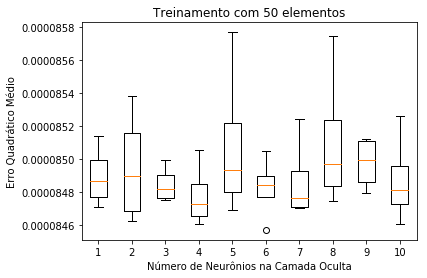

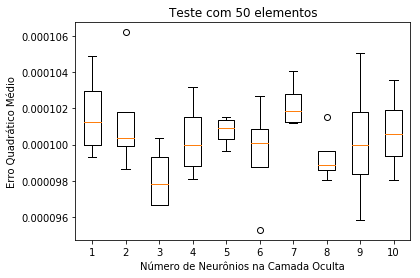

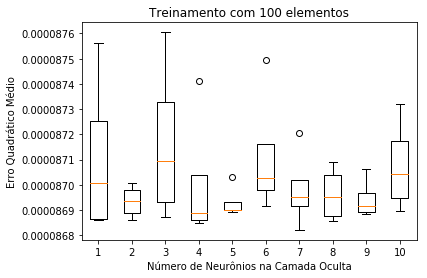

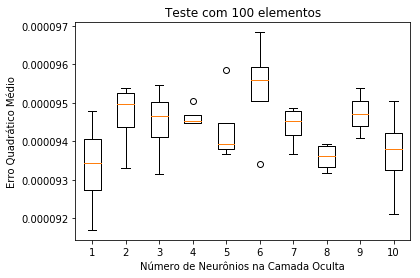

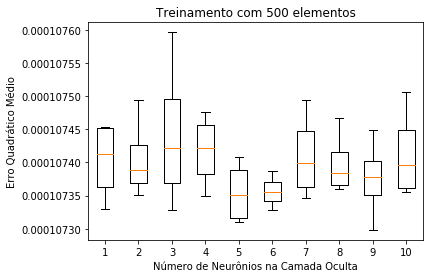

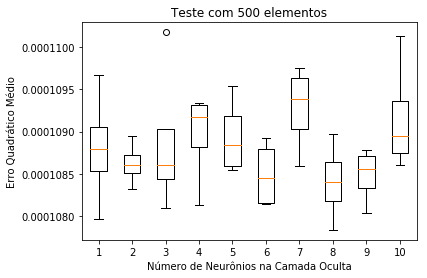

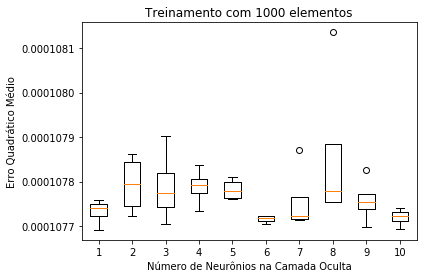

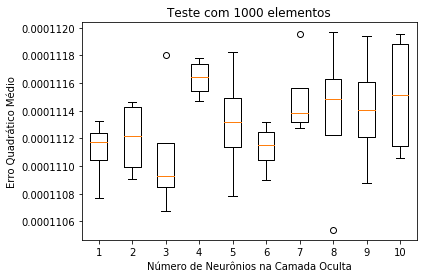

In [6]:
#Conjunto de treinamento com 50 elementos
cont_figure = 0

for comp in COMP:
    cont_figure+=1
    Xtr = X[0:comp]
    Dtr = D[0:comp]
    Xt = X[comp:2*comp]
    Dt = D[comp:2*comp]
    [erropredtr,erropredt] = cross_train(N, P, Xtr, Xt, Dtr, Dt)

    #Erro de predição no treinamento
    plt.figure(cont_figure)
    plt.title("Treinamento com "+ str(comp)+ " elementos")
    plt.xlabel("Número de Neurônios na Camada Oculta")
    plt.ylabel("Erro Quadrático Médio")
    plt.boxplot(erropredtr)
    plt.show()

    cont_figure+=1
    
    #Erro de predição no teste
    plt.figure(cont_figure)
    plt.title("Teste com " + str(comp) + " elementos")
    plt.xlabel("Número de Neurônios na Camada Oculta")
    plt.ylabel("Erro Quadrático Médio")
    plt.boxplot(erropredt)
    plt.show()